# Workshop 9: ANNs
---

## 1) Neural Network Playground (Follow: Explore individually; Discuss as a Class)

First, go to Tensorflow's [Neural Network Playground](https://playground.tensorflow.org/). This website is an interactive and exploratory visualization of how the features, number of layers, training time, etc, influence the classification boundries of an ANN. Right now, we'll only worry ourselves with *classification* problems.

Play with the visualization, and then answer the following questions below.

### Scenarios

1. Using the default network topology, try training the network with the different activation functions (ReLU, Tanh, Sigmoid, Linear). What effect does the activation function have on the training time? What effect does the activation function have on the shape of the classification boundries?
2. Take a look at [this setup](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.21855&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). Train until the classification boundry converges. This is one of the rare cases where the nodes in an ANN can be (semi) interpreted. What do the nodes in the first hidden layer represent? What about the second hidden layer? How do you think the ANN uses these learned "features" to make a decision?

### Exploration
For each of the following questions:
* Make a prediction before you begin exploring and testing.
* Explain why you think this scenario has this property.

**Questions**

3. Find a scenario where a simple model (fewer neurons) outperforms a complex model. (In regards to overfitting)
4. Find a scenario where no hidden layers perform well.
5. Find a scenario where a model with no hidden layers performs poorly no matter the features.
6. Find a scenario where it takes a lot of training time to get a correct solution.

1. [Answer]
2. [Answer]
3. [Answer]
4. [Answer]
5. [Answer]
6. [Answer]

## 2) Training and Testing a Neural Network (Group)

For this problem, you'll be looking at a reduced subset of the [Credit Card Fraud Data](https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains transactions made by credit cards in September 2013 by European cardholders, including some fradulent transactions.
 
There are two interesting properties about this dataset:

1) **The data only contains dimensionality reduced data from a PCA transformation.** Sometimes, due to privacy concerns, all of the features (and even the names of the features used) cannot be known. Therefore, you'll be trying to train a model of data that has been reduced in dimensions with uninterpretable features.

2) **The dataset is highly unbalanced.** The positive class (frauds) account for 0.172% of all transactions.

Knowing the data, what classification metrics (Precision, Recall, F1-Score) are most appropriate and why?

**Write your answer here.**

For this question, **you have enough experience to do the entire model pipeline yourself**. That means *loading the data, creating splits, scaling the data, training and tuning the model, and evaluating the model.*

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

random_state = 42

### Step 1: Load the data into a dataframe. Use `value_counts` to check the class balance.

In [24]:
df = pd.read_csv('creditcard.csv')
df['Class'].value_counts()

0    85284
1      158
Name: Class, dtype: int64

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Step 2: Partition the data into an X dataframe (features) and Y single-column dataframe (class)

In [4]:
Features = df.drop(columns=['Class']).copy()

Class = df['Class'].copy()

print('Features shape')
print(Features.shape)

print('Class shape')
print(Class.shape)

Features shape
(85442, 30)
Class shape
(85442,)


### Step 3: Create your train/test split. Use the provided random_state.

**Note**: You should use a `train_size` of 0.7, or 70%

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train,y_test = train_test_split(Features,Class, train_size=0.7)

print("X_train shape")
print(X_train.shape)

print("y_train shape")
print(y_train.shape)

print("X_test shape")
print(X_test.shape)

print("y_test shape")
print(y_test.shape)

X_train shape
(59809, 30)
y_train shape
(59809,)
X_test shape
(25633, 30)
y_test shape
(25633,)


In [29]:
print('y_train value counts')
print(y_train.value_counts())

print('\n\ny_test value counts')
print(y_test.value_counts())

y_train value counts
0    59700
1      109
Name: Class, dtype: int64


y_test value counts
0    25584
1       49
Name: Class, dtype: int64


### Step 4: Use a [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to standardize the data. 

Fit the scaler only the the training X features, and then apply it to both training and test X features. We do this because in practice, we wouldn't be able to see data in the test X, so it shouldn't affect feature transformation. We therefore only use X_train for feature transformation.

**Note**: Even though most of the features are already transformed using PCA (which would not require additional standardize), there is one other feature (time) that is not, so we should scale as a best practice.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape")
print(X_train.shape)

print("y_train shape")
print(y_train.shape)

print("X_test shape")
print(X_test.shape)

print("y_test shape")
print(y_test.shape)

X_train shape
(59809, 30)
y_train shape
(59809,)
X_test shape
(25633, 30)
y_test shape
(25633,)


### Step 5:  Train an MLP with default hyperparameters.

For the following, you'll be using sklearn's built in Multi-layer Perceptron classifier [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

Use the default hyperparams aside from `max_iter`. `max_iter` is how many iterations of training the ANN goes though until it manually stops. The default `max_iter=200` is too long for our data currently. 

**Use random_state as the random_states and max_iter=20**. The detault parameters will use a single hidden layer.



In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
clf = MLPClassifier(random_state=random_state, max_iter=20).fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Fit Score')
clf.score(X_test, y_test)

Fit Score


0.9990246947294503

### Step 6:  Evaluate the model on the test dataset using a confusion matrix and a classification report

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
print('\033[1m') 
print('CONFUSION MATRIX:')
print('\033[0m', end='')
print(confusion_matrix(y_test, y_predict))

print('\n\n\033[1m', end='')
print('CLASSIFICATION REPORT')
print('\033[0m', end='')
print(classification_report(y_test, y_predict))


CONFUSION MATRIX:
[[25579     5]
 [   20    29]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25584
           1       0.85      0.59      0.70        49

    accuracy                           1.00     25633
   macro avg       0.93      0.80      0.85     25633
weighted avg       1.00      1.00      1.00     25633



If all went well, your model should have an accuracy of almost 100%. Use `classification_report` to explain what you think happened. Is the model performing well? If not, is it overfitting or underfitting? Remember that the classes in the problem are very imbalanced, but out main goal is to detect fraud (class 1).

**Note**: `classification_report` outputs Precision, Recall and F1 for both classes. Remember that how we calculate these metrics depends on which class we treat as the positive class. If we say Class 0 is the positive class, a FP means incorrectly predicting Class 0, but for Class 1 a FP is incorrectly predicting Class 1.

**Answer here**.

## 3) Hyperparameters (Group)

**Hyperparams**:

ANNs have *a lot* of hyperparams. This can include simple things such as the number of layers and nodes, up to tuning the learning rate and the gradient descent algorithm used. 

Unfortunately, there is no tried an true method for selecting hyperparams for a neural network. It requires a lot of experimentation and intution through experience. (In fact, one of the most successful methods in training neural networks is *Graduate Student Descent*, where you simply give the laborious process of tuning to a graduate student while you go and do more research!)

For now, the paramaters that you should explore are:

* `activation`: The activation function of the the ANN. Defaults to ReLU.
* `max_iter`: The ANN will train iterations until either the loss stops improving by a specified threshold, or `max_iters` is reached. Warning: the more you increase this, the more the training time will take! Patience is a virtue.
* `hidden_layer_sizes`: A tuple representing the structure of the hidden layers. For example, giving the tuple `(100,50)` means that there's two hidden layers: the first being of size 100, and the second being of size 50. The tuple (100,) would mean a single hidden layer of size 100.

**Try different permutations of these hyperprams and see how it affects the classification scores of your model.**

In [16]:
from sklearn.model_selection import GridSearchCV

clf2 = MLPClassifier(random_state=random_state).fit(X_train, y_train)

parameters = {'activation':['identity','logistic','tanh','relu'], 'max_iter':[10,15,20],\
              'hidden_layer_sizes':[(20,),(20,20),(40,),(40,40)]}

reg=GridSearchCV(clf2, parameters)
reg.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(20,), (20, 20), (40,),
                                                (40, 40)],
                         'max_iter': [10, 15, 20]})

In [17]:
reg.cv_results_

{'mean_fit_time': array([0.97240834, 1.40522275, 1.87312751, 1.23222466, 1.83389587,
        2.45855446, 1.0572752 , 1.58173804, 2.04868426, 1.4437151 ,
        2.09001245, 2.93011413, 1.26729445, 1.91077294, 2.2648222 ,
        1.51448731, 2.36574721, 3.12684884, 1.29607105, 1.95819392,
        2.6182847 , 1.96234269, 2.95452662, 3.98048501, 1.18071837,
        1.79875851, 2.40244188, 1.77859812, 2.68349714, 3.46445675,
        1.49906859, 2.12478976, 2.76118584, 2.0431253 , 3.1088387 ,
        4.20351009, 1.13626199, 1.60160322, 2.14512978, 1.52837496,
        2.30495305, 3.02778978, 1.24337058, 1.88983593, 2.60603523,
        1.91862154, 2.70618057, 3.63070059]),
 'std_fit_time': array([0.0607501 , 0.03419184, 0.09564896, 0.05468422, 0.00447507,
        0.08041   , 0.02844369, 0.03065138, 0.05502144, 0.0438601 ,
        0.05017969, 0.19048164, 0.03186314, 0.10393002, 0.07980433,
        0.05493482, 0.07025839, 0.0299048 , 0.04709986, 0.07671117,
        0.0596222 , 0.04875543, 0.065

In [18]:
RESULTS = pd.DataFrame(columns=['param_activation','param_max_iter','param_hidden_layer_sizes','mean_test_score'])

RESULTS['param_activation'] = reg.cv_results_['param_activation']
RESULTS['param_max_iter'] = reg.cv_results_['param_max_iter']
RESULTS['param_hidden_layer_sizes'] = reg.cv_results_['param_hidden_layer_sizes']
RESULTS['mean_test_score'] = reg.cv_results_['mean_test_score']

RESULTS

,param_activation,param_max_iter,param_hidden_layer_sizes,mean_test_score
0,identity,10,"(20,)",0.998178
1,identity,15,"(20,)",0.998311
2,identity,20,"(20,)",0.998545
3,identity,10,"(20, 20)",0.998713
4,identity,15,"(20, 20)",0.999080
5,identity,20,"(20, 20)",0.999164
6,identity,10,"(40,)",0.998462
7,identity,15,"(40,)",0.998863
8,identity,20,"(40,)",0.999114
9,identity,10,"(40, 40)",0.998947


In [19]:
best_estimator = reg.best_estimator_
print(best_estimator)

Predicted_test = best_estimator.predict(X_test)

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 20), max_iter=20,
              random_state=42)


In [52]:
print('\033[1m', end = '') 
print('Predicted test shape')
print('\033[0m', end = '')
print(Predicted_test.shape)

print('\n\n\033[1m', end = '')
print('y_test shape')
print('\033[0m', end = '')
print(y_test.shape)

print('\n\n\033[1m', end = '')
print('CONFUSION MATRIX:')
print('\033[0m', end = '')
print(confusion_matrix(y_test, Predicted_test))

print('\n\n\033[1m', end = '')
print('CLASSIFICATION REPORT')
print('\033[0m', end = '')
print(classification_report(y_test, Predicted_test))

Predicted test shape
(25633,)


y_test shape
(25633,)


CONFUSION MATRIX:
[[25578     6]
 [   12    37]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25584
           1       0.86      0.76      0.80        49

    accuracy                           1.00     25633
   macro avg       0.93      0.88      0.90     25633
weighted avg       1.00      1.00      1.00     25633



<AxesSubplot:xlabel='Class'>

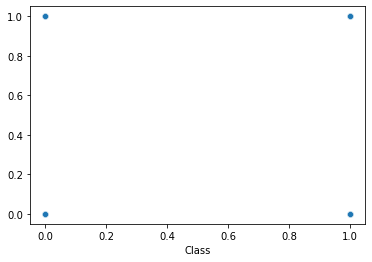

In [21]:
import seaborn as sns

sns.scatterplot(x=y_test,y=Predicted_test)

<AxesSubplot:xlabel='Class'>

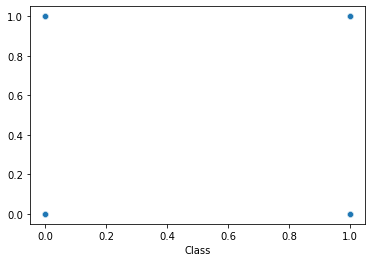

In [22]:
Predicted_train = best_estimator.predict(X_train)
sns.scatterplot(x=y_train,y=Predicted_train)

Answer the following questions:
1. What criteria did you use to determine which model hyperparameters performed "best"? Why? Justify your answer with respect to the problem: fraud detection.
2. What hyperparameters performed best. Why do you think they performed best?